In [7]:
#Social_Network_Ads.csv

**Import libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [9]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [10]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

**Splitting the dataset into the Training set and Test set**

In [11]:
x=df.iloc[:,1:3]
y=df['Purchased']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Fitting SVM to the Training set**

In [14]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
svc.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [16]:
y_pred=svc.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
cm=confusion_matrix(y_test,y_pred)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        81
           1       0.82      0.79      0.81        39

    accuracy                           0.88       120
   macro avg       0.86      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120



In [21]:
accuracy_score(y_test,y_pred)

0.875

**Visualising the Training set results**

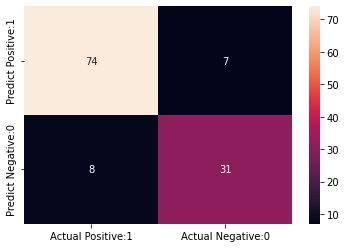

In [25]:
cm_matrix=pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],index=["Predict Positive:1","Predict Negative:0"])
sns.heatmap(cm_matrix,annot=True)

**Visualising the Test set results**

Test set accuracy: 0.88


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


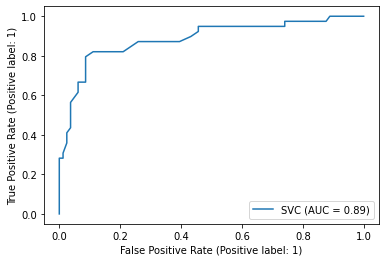

In [29]:
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
plot_roc_curve(svc,x_test,y_test)